In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [68]:
print(plt.style.available)
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


- load & select the data (1% - 10%)
- process the data (60% - 80%)
- visualize the data ( ~%)

In [69]:
pd.set_option('display.max_columns', None)

In [70]:
canada = pd.read_excel('Canada.xlsx', sheet_name=1, skiprows=20, skipfooter=2)

- DataFrame -> 2D matrix with rows and cols
- Series -> 1D matrix with 1 cols

### selection of data
- head() - top 5
- tail() - last 5
- sample() - random record

In [71]:
canada.head(3)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


In [72]:
canada.sample()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
146,Immigrants,Foreigners,Saint Lucia,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,69,89,133,69,68,80,95,92,77,76,95,126,120,142,76,100,111,84,57,83,94,116,82,89,110,185,190,255,298,257,249,261,382,392



- single column
    - dict style
    - object 
- multiple columns
    - list style

In [73]:
canada['OdName']

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: OdName, Length: 195, dtype: object

In [74]:
canada.OdName

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: OdName, Length: 195, dtype: object

In [75]:
cols = ['OdName', 1980, 1990, 2000, 2010]
canada[cols] # list of columns -> returns dataframe

,OdName,1980,1990,2000,2010
0,Afghanistan,16,1028,3326,1758
1,Albania,1,3,1816,561
2,Algeria,80,491,2867,4752
3,American Samoa,0,2,0,0
4,Andorra,0,3,0,0
...,...,...,...,...,...
190,Viet Nam,1191,3801,1803,1942
191,Western Sahara,0,0,0,0
192,Yemen,1,4,122,211
193,Zambia,11,77,39,102


Row wise slicing
- iloc[ ] - indexed location
- loc[ ] - labelled location

In [76]:
canada.iloc[66]

Type                Immigrants
Coverage            Foreigners
OdName                 Georgia
AREA                       935
AreaName                  Asia
REG                        922
RegName           Western Asia
DEV                        902
DevName     Developing regions
1980                         0
1981                         0
1982                         0
1983                         0
1984                         0
1985                         0
1986                         0
1987                         0
1988                         0
1989                         0
1990                         0
1991                         0
1992                         8
1993                        22
1994                        27
1995                        67
1996                        49
1997                        46
1998                        92
1999                        46
2000                        83
2001                       124
2002                       123
2003    

In [77]:
canada.index

RangeIndex(start=0, stop=195, step=1)

In [78]:
canada.set_index('OdName', inplace=True) # set the 'OdName' column as the index

In [79]:
canada.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='OdName', length=195)

In [80]:
canada.loc['Cambodia']

Type                Immigrants
Coverage            Foreigners
AREA                       935
AreaName                  Asia
REG                        920
RegName     South-Eastern Asia
DEV                        902
DevName     Developing regions
1980                        12
1981                        19
1982                        26
1983                        33
1984                        10
1985                         7
1986                         8
1987                        14
1988                        15
1989                        27
1990                        34
1991                        38
1992                        93
1993                       418
1994                       371
1995                       286
1996                       216
1997                       313
1998                       241
1999                       165
2000                       245
2001                       259
2002                       230
2003                       277
2004    

In [81]:
years = list(range(1980, 2014))
print(years)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


<Axes: title={'center': 'Japans Immigration to Canada'}>

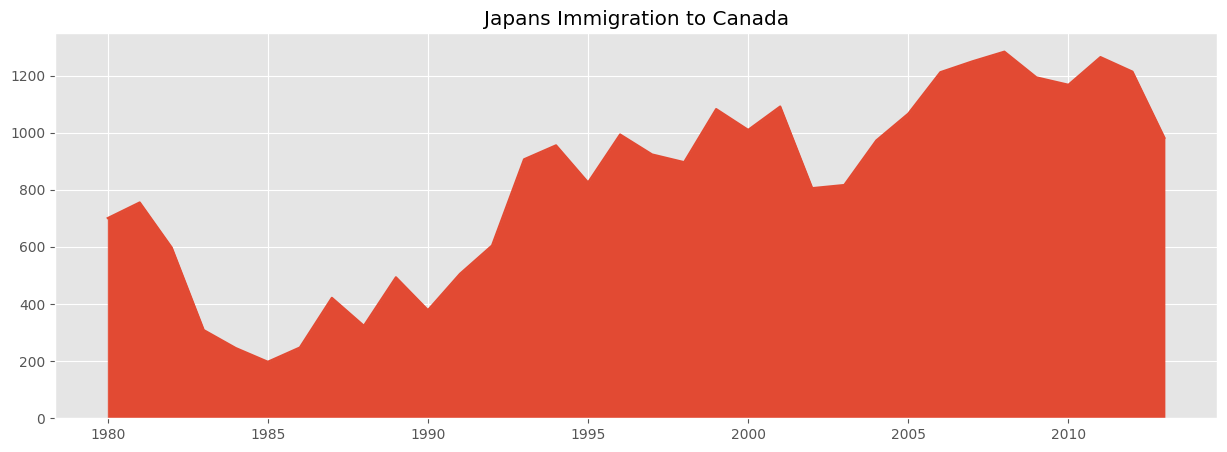

In [82]:
canada.loc['Japan', years].plot(kind='area', title='Japans Immigration to Canada', 
    figsize=(15,5))

In [83]:
countries = ['Cambodia','Japan','France']
canada.loc[countries, years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
OdName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cambodia,12,19,26,33,10,7,8,14,15,27,34,38,93,418,371,286,216,313,241,165,245,259,230,277,348,370,529,460,354,203,200,196,233,288
Japan,701,756,598,309,246,198,248,422,324,494,379,506,605,907,956,826,994,924,897,1083,1010,1092,806,817,973,1067,1212,1250,1284,1194,1168,1265,1214,982
France,1729,2027,2219,1490,1169,1177,1298,1658,2038,2332,2177,2911,3487,3709,2759,3332,2623,2473,3214,3343,3765,3806,3463,3568,4391,4429,4002,4290,4532,5051,4646,4080,6280,5623


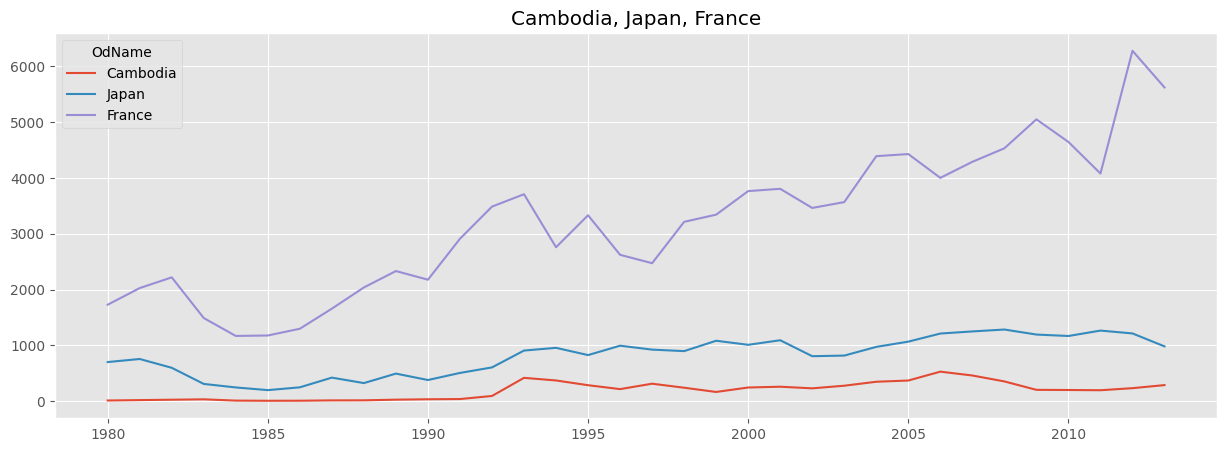

In [84]:
canada.loc[countries, years].T.plot(kind='line', title=f'{", ".join(countries)}', 
    figsize=(15,5))
plt.savefig('comparing-3-countries.png')